In [1]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

df_news = pd.read_pickle("df_news_3keyword_com.pkl")

def change48VToClass(num):
    if num <= 1000:
        return "一千以下"
    elif num <= 10000:
        return "一萬以下"
    elif num <= 100000:
        return "十萬以下"
    elif num <= 1000000:
        return "百萬以下"
    else:
        return "超過百萬"


def change48VToClass2(num):
    if num <= 1000:
        return "1000"
    elif num <= 5000:
        return "5000"
    elif num <= 10000:
        return "10000"
    elif num <= 50000:
        return "50000"
    elif num <= 100000:
        return "100k"
    elif num <= 500000:
        return "500k"
    elif num <= 1000000:
        return "1m"
    else:
        return ">1m"
    

def change48VToClass3(num):
    if num <= 1647:
        return "VL"
    elif num <= 3117:
        return "L"
    elif num <= 5666:
        return "M"
    elif num <= 14177:
        return "H"
    else:
        return "VH"

In [ ]:
a = list(df_news["48hr_views"])
a.sort()
print(a[int(len(a)*0.2)])
print(a[int(len(a)*0.4)])
print(a[int(len(a)*0.6)])
print(a[int(len(a)*0.8)])

In [2]:
df_news_cls = df_news
df_news_cls["class"] = df_news["48hr_views"].apply(change48VToClass2)

a = set()
for tmp in list(df_news_cls["class"]):
    a.add(tmp)
print(a)

# print(df_news_cls.groupby('class').count())
print(df_news_cls['class'].value_counts())

x_total = df_news_cls.drop(["class", "tag", "48hr_views"], axis=1)
y_total = df_news_cls["class"]
x_train, x_test, y_train, y_test = train_test_split(x_total, y_total, test_size=0.2)

print(y_train.value_counts())
print(y_test.value_counts())

{'>1m', '100k', '1m', '5000', '500k', '50000', '1000', '10000'}
5000     1756
50000     751
10000     674
1000      341
100k      134
500k       99
1m         12
>1m         6
Name: class, dtype: int64
5000     1388
50000     599
10000     555
1000      272
100k      111
500k       78
1m         10
>1m         5
Name: class, dtype: int64
5000     368
50000    152
10000    119
1000      69
100k      23
500k      21
1m         2
>1m        1
Name: class, dtype: int64


In [3]:
x_train, x_test, y_train, y_test = train_test_split(x_total, y_total, test_size=0.2)
clf = RandomForestClassifier(n_estimators=35, max_depth=5)

# np.average(cross_val_score(clf, x_train, y_train, cv=10))
clf = clf.fit(x_train, y_train)


from sklearn.metrics import accuracy_score
y_pred = clf.predict(x_test)
print("正確率:",accuracy_score(y_test,y_pred))
# print(y_pred.value_counts())

正確率: 0.27019867549668874


In [ ]:
print(y_pred)

Confusion matrix, without normalization
[[27  7 34 39 41]
 [36 10 35 39 58]
 [23 10 32 27 32]
 [32  4 25 55 31]
 [12 14 30 22 80]]


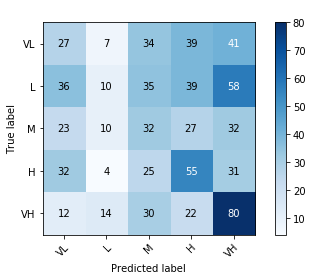

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

# class_names = ['1000', '5000', '10000', '50000','100k','500k','1m','>1m']
# class_names = [' ', ' ', ' ', ' ',' ',' ',' ',' ']
class_names = ["VL", "L", "M", "H", "VH"]

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):

    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Only use the labels that appear in the data
    # classes = classes[unique_labels(y_true, y_pred)]

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)


    
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # plt.figure(figsize=(28,20))

    # Rotate the tick labels and set their alignment.

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

# plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=True, title='Normalized confusion matrix')
plot_confusion_matrix(y_test, y_pred, classes=class_names,title='  ')

In [ ]:
unique_labels(y_test, y_pred)

In [ ]:
from sklearn.tree import export_graphviz
import graphviz
dot_data = export_graphviz(clf, out_file=None,feature_names=x_train.columns,filled=True, rounded=True,special_characters=True)
graph = graphviz.Source(dot_data)
# 你可以把註解解除, 輸出一個 pdf
# graph.render("boston")
graph

In [ ]:
lm = LinearRegression()
df_news


In [ ]:
df_news_cls[df_news_cls["48hr_views"]>500000].count()

In [ ]:
# 這邊是回歸的
df_news_reg = df_news
# df_news_reg["48hr_views"] = df_news["48hr_views"].apply(lambda x: math.log10(x+1))

x_total = df_news_reg.drop(["tag", "48hr_views"], axis=1)
y_total = df_news_reg["48hr_views"]

x_train, x_test, y_train, y_test = train_test_split(x_total, y_total, test_size=0.2)

from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor(n_estimators=40, max_depth=6)

# np.average(cross_val_score(clf, x_train, y_train, cv=10))
clf = clf.fit(x_train, y_train)


from sklearn.metrics import r2_score
pred = clf.predict(x_test)
print("隨機森林r2_score:",r2_score(y_test,pred))

lm.fit(x_train, y_train)
pred = lm.predict(x_test)
print("迴歸r2_score:",r2_score(y_test,pred))

In [ ]:
df_news_reg

In [ ]:
min(df_news_reg["48hr_views"])

In [ ]:
plt.figure(figsize=(28,20))
plt.title("heatmap",y = 1.05,size = 30)
sns.heatmap(df_news_reg.drop(["tag"],axis=1).astype(float).corr(),cmap = "BrBG",linewidths=0.1,square=True, linecolor="white",annot=True)